<a href="https://colab.research.google.com/github/jiruneko/Deeplearning_review/blob/main/DL_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras import layers
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5,
          validation_data=(x_test, y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8800 - loss: 0.4272 - val_accuracy: 0.9585 - val_loss: 0.1363
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9665 - loss: 0.1127 - val_accuracy: 0.9708 - val_loss: 0.0964
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9785 - loss: 0.0752 - val_accuracy: 0.9731 - val_loss: 0.0893
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9836 - loss: 0.0544 - val_accuracy: 0.9763 - val_loss: 0.0755
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9866 - loss: 0.0433 - val_accuracy: 0.9785 - val_loss: 0.0681


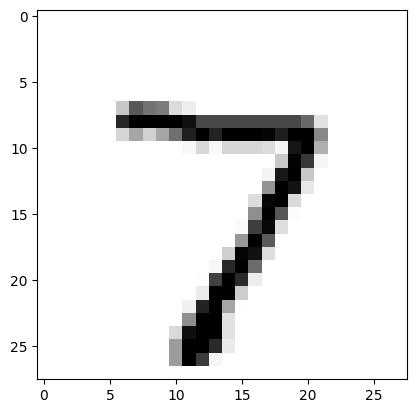

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_test[0], cmap="Greys")
plt.show()
pre = model.predict(x_test)
index = np.argmax(pre[0])
print(index)

In [ ]:
X1 = [0,1,0,1]
X2 = [0,0,1,1]

def test(x1, x2):
  if x1 == 1 and x2 == 1:
    return 1
  else:
    return 0

def disp_results(func):
  for i in range(4):
    Y = func(X1[i], X2[i])
    print(f"{X1[i]}, {X2[i]} = {Y}")

disp_results(test)

0, 0 = 0
1, 0 = 0
0, 1 = 0
1, 1 = 1


In [ ]:
def and_test(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.8
  ans = w1 * x1 + w2 * x2
  if ans > theta:
    return 1
  else:
    return 0

disp_results(and_test)

0, 0 = 0
1, 0 = 0
0, 1 = 0
1, 1 = 1


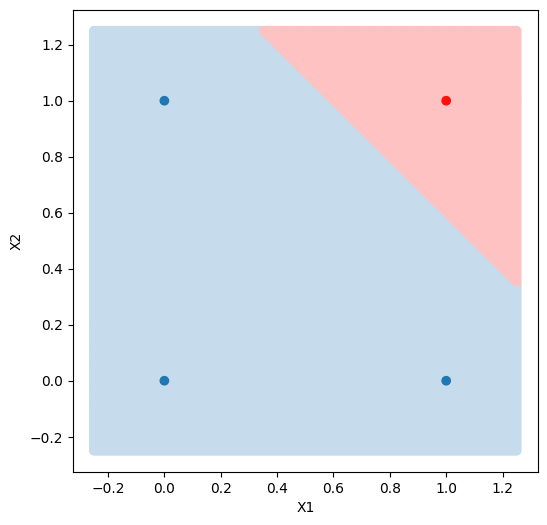

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fillscolors(data):
  return "#ffc2c2" if data > 0 else "#c6dcec"
def dotscolors(data):
  return "#ff0e0e" if data > 0 else "#1f77b4"

def plot_perceptron(func, X1, X2):
  plt.figure(figsize=(6, 6))
  XX, YY = np.meshgrid(
      np.linspace(-0.25, 1.25, 200),
      np.linspace(-0.25, 1.25, 200))
  XX = np.array(XX).flatten()
  YY = np.array(YY).flatten()
  fills = []
  colors = []
  for i in range(len(XX)):
    fills.append(func(XX[i], YY[i]))
    colors.append(fillscolors(fills[i]))
  plt.scatter(XX, YY, c=colors)

  dots = []
  colors = []
  for i in range(len(X1)):
    dots.append(func(X1[i], X2[i]))
    colors.append(dotscolors(dots[i]))
  plt.scatter(X1, X2, c=colors)
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.show()

plot_perceptron(and_test, X1, X2)

0, 0 = 0
1, 0 = 1
0, 1 = 1
1, 1 = 1


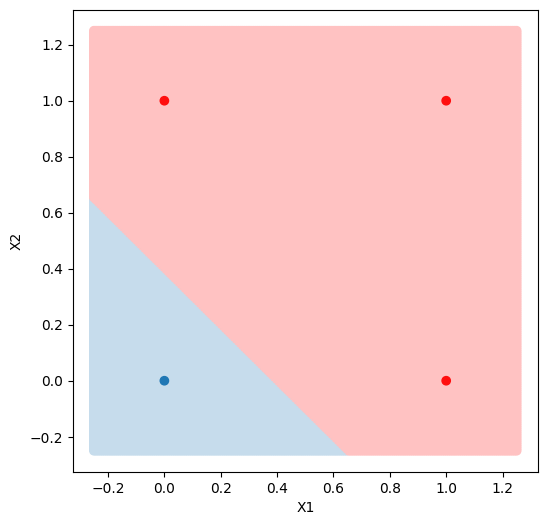

In [ ]:
def or_test(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.2
  ans = w1 * x1 + w2 * x2
  if ans > theta:
    return 1
  else:
    return 0

disp_results(or_test)

plot_perceptron(or_test, X1, X2)

0, 0 = 1
1, 0 = 1
0, 1 = 1
1, 1 = 0


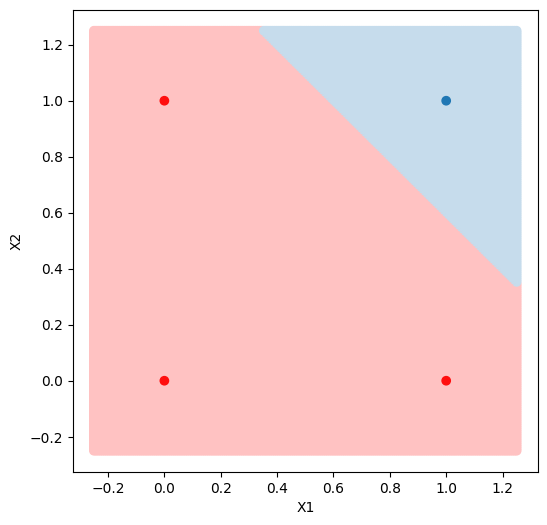

In [ ]:
def nand_test(x1, x2):
  w1, w2, theta = -0.5, -0.5, -0.8
  ans = w1 * x1 + w2 * x2
  if ans > theta:
    return 1
  else:
    return 0

disp_results(nand_test)

plot_perceptron(nand_test, X1, X2)

In [ ]:
def xor_test(x1, x2):
  if or_test(x1, x2) > 0:
    s1 = 1
  else:
    s1 = 0
  if nand_test(x1, x2) > 0:
    s2 = 1
  else:
    s2 = 0
  ans = and_test(s1, s2)
  if ans > 0:
    return 1
  else:
    return 0

disp_results(xor_test)

0, 0 = 0
1, 0 = 1
0, 1 = 1
1, 1 = 0


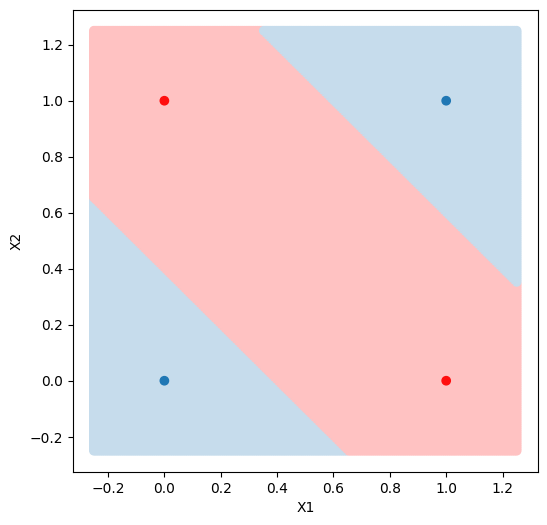

In [ ]:
plot_perceptron(xor_test, X1, X2)

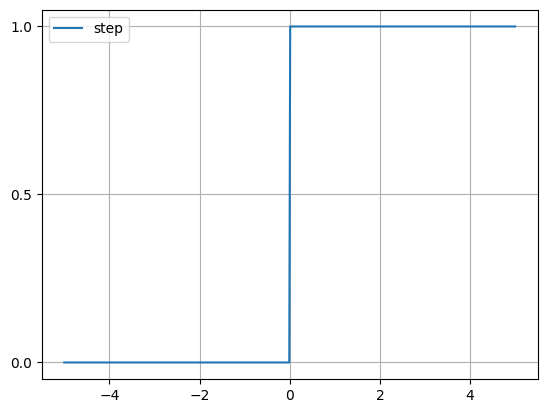

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def step_func(x):
  return np.where(x>0, 1, 0)
x1 = np.linspace(-5, 5, 500)
y1 = step_func(x1)

plt.plot(x1, y1)
plt.legend(["step"], loc="best")
plt.yticks(np.arange(0, 1.2, step=0.5))
plt.grid()
plt.show()

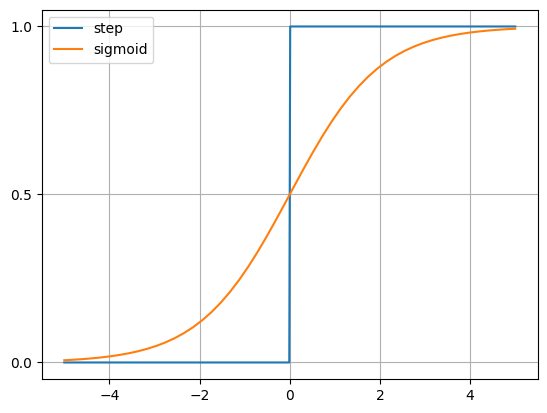

In [ ]:
def sigmoid_func(x):
  return 1/(1+np.exp(-x))
x2 = np.linspace(-5, 5)
y2 = sigmoid_func(x2)

plt.plot(x1, y1)
plt.plot(x2 ,y2)
plt.legend(["step", "sigmoid"], loc="best")
plt.yticks(np.arange(0, 1.2, step=0.5))
plt.grid()
plt.show()

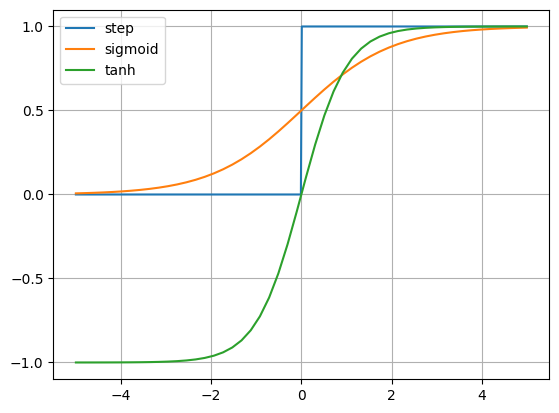

In [ ]:
def tanh_func(x):
  return np.tanh(x)
x3 = np.linspace(-5, 5)
y3 = tanh_func(x3)

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.legend(["step", "sigmoid", "tanh"], loc="best")
plt.yticks(np.arange(-1, 1.2, step=0.5))
plt.grid()
plt.show()

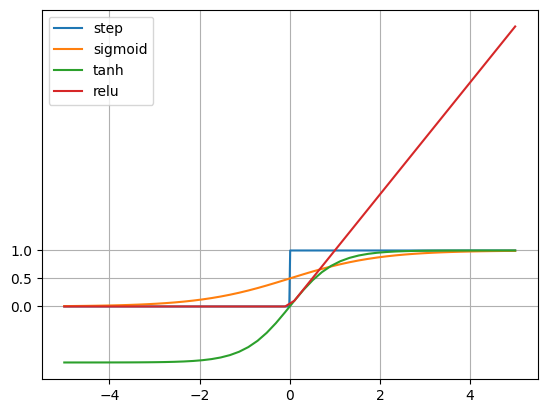

In [ ]:
def relu_func(x):
  return np.where(x>0, x, 0)
x4 = np.linspace(-5, 5)
y4 = relu_func(x4)

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.legend(["step", "sigmoid", "tanh", "relu"], loc="best")
plt.yticks(np.arange(0, 1.2, step=0.5))
plt.grid()
plt.show()

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=17c9b2d42919478395c8fd35a9191c7bc93281b6bb9c5d43460e20fc48c28867
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

In [ ]:
input_data = [[0, 0], [1, 0], [0, 1], [1, 1]]
xor_data = [0, 1, 1, 0]
x_train = x_test = np.array(input_data)
y_train = y_test = np.array(xor_data)

print("学種データ（問題）:")
print(x_train)
print(f"学習データ（答え）:{y_train}")

学種データ（問題）:
[[0 0]
 [1 0]
 [0 1]
 [1 1]]
学習データ（答え）:[0 1 1 0]


In [ ]:
model = keras.models.Sequential()
model.add(layers.Dense(3, activation="relu", input_dim=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
